<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<style>
    h1 {
        line-height: 200%;
        font-family: 'Comic Sans MS', cursive, sans-serif;
        color: #ffb6c1; /* رنگ نارنجی پاستیلی */
    }
</style>
</head>
<body>
    <h1>Zahra Alinaghipour</h1>
</body>
</html>


Train a model to distinguish between recreational or business purposes of travel, i.e., why a ticket is reserved.

In [10]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np 

from sklearn.preprocessing import LabelEncoder

|Column|Description|
|:------:|:---:|
|Created|Time of ticket registration|
|CancelTime|Time when the passenger canceled the ticket|
|DepartureTime|Time of departure|
|BillID|Purchase ID|
|TicketID|Ticket ID|
|ReserveStatus|Number of passing vehicles|
|UserID|User ID|
|Male|Whether the ticket belongs to a female or male|
|Price|Ticket price without discount|
|CouponDiscount|Discount applied to the ticket by the person|
|From|Travel origin|
|To|Travel destination|
|Domestic|Whether the travel is domestic or international|
|VehicleType|Specifies details of the vehicle|
|VehicleClass|Whether the vehicle is first class or not|
|Vehicle|Type of vehicle|
|Cancel|Whether the ticket is canceled or not|
|HashPassportNumber_p|Hashed passport number|
|HashEmail|Hashed email|
|BuyerMobile|Hashed mobile number|
|NationalCode|Hashed national code|
|TripReason|Reason for the trip|

In [4]:
train_data = pd.read_csv('../data/train_data.csv')
train_data

,Created,CancelTime,DepartureTime,BillID,TicketID,ReserveStatus,UserID,Male,Price,CouponDiscount,...,Domestic,VehicleType,VehicleClass,TripReason,Vehicle,Cancel,HashPassportNumber_p,HashEmail,BuyerMobile,NationalCode
0,2022-10-23 09:38:49.110,NaN,2022-11-02 23:59:00,39710203,1091777.0,5,122885.0,True,6600000.0,34425.0,...,1,NaN,False,Work,Plane,0,NaN,66c7f29e3b92f3b77e20830ac29e7758037a53d2238a5b...,764974891906,477368495
1,2022-08-15 14:51:43.160,NaN,2022-08-18 04:15:00,38689463,1070902.0,5,876925.0,True,9500000.0,0.0,...,1,NaN,False,Int,Plane,0,NaN,b24634843858a4175d03422aa9e7211ec3b9f3ce4c481c...,27479149496,15987669
2,2022-09-20 17:25:27.250,NaN,2022-09-21 11:00:00,39245173,7624237.0,3,916640.0,False,2000000.0,0.0,...,1,VIP 2+1,True,Work,Bus,0,NaN,NaN,323657282999,667640412
3,2022-06-25 11:32:53.980,NaN,2022-06-26 08:30:00,37957585,2867547.0,2,NaN,False,40000.0,0.0,...,1,3 ستاره اتوبوسي,NaN,Int,Train,0,NaN,NaN,169459057632,392476186
4,2022-06-01 11:30:53.633,NaN,2022-06-02 23:00:00,37584530,7212559.0,3,NaN,True,1130000.0,0.0,...,1,اسکانیا تک صندلی ۳۱نفره,True,Int,Bus,0,NaN,NaN,408595008421,79497837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101012,2022-06-01 00:20:14.280,NaN,2022-06-04 12:10:00,37579327,1050781.0,5,NaN,True,5900000.0,0.0,...,1,بوئینگ 737,False,Int,Plane,0,NaN,NaN,605105141718,103215806
101013,2022-10-29 20:54:31.330,NaN,2022-11-01 15:30:00,39789479,3085407.0,2,403095.0,True,926500.0,0.0,...,1,4 ستاره اتوبوسي نگين,NaN,Work,Train,0,NaN,NaN,414997568556,193262890
101014,2022-09-03 17:57:22.067,NaN,2022-09-13 09:30:00,38991563,2322052.0,5,528307.0,True,30000000.0,0.0,...,0,NaN,False,Int,InternationalPlane,0,47b8f2d9b5de7e0e0e7234c18a1aa0c4b35798e6cb46b4...,a4dcb7941ee3c8f7b1fc6a171015692bc961d65a84ad47...,99460830937,34732401
101015,2022-09-29 13:15:51.303,NaN,2022-09-29 17:30:00,39406503,7664730.0,3,797946.0,True,980000.0,0.0,...,1,25 نفره (VIP),True,Work,Bus,0,NaN,718bc52c3e88520531463b385998a1193e2821d518b60b...,487489926847,458338866


In [5]:
test_data = pd.read_csv('../data/test_data.csv')
test_data

,Created,CancelTime,DepartureTime,BillID,TicketID,ReserveStatus,UserID,Male,Price,CouponDiscount,...,To,Domestic,VehicleType,VehicleClass,Vehicle,Cancel,HashPassportNumber_p,HashEmail,BuyerMobile,NationalCode
0,2022-07-22 12:52:35.293,NaN,2022-08-03 17:00:00,38372770,7429183.0,3,NaN,False,1220000.0,0.0,...,اصفهان,1,ماهانVIP مانیتوردار کاوه,True,Bus,0,NaN,7ec2bc45a1a56014c60beb9e6ae72e748563f270b5961e...,855578545022,752371627
1,2022-05-16 10:55:29.397,2022-05-18 11:35:15.643,2022-05-19 17:00:00,37348034,7147402.0,5,NaN,True,2830000.0,0.0,...,قم,1,VIP 2+1 / سیستم تهویه مطبوع / تخت شو,True,Bus,1,NaN,09731a27ab7323fa8a65a5d61a6f6cdf5b127a5d89d1af...,687891042993,926996211
2,2022-02-13 16:10:33.870,NaN,2022-02-15 22:45:00,36058084,6817410.0,3,NaN,True,1480000.0,0.0,...,اردبیل,1,25 نفره (VIP),True,Bus,0,NaN,NaN,515831406373,890191812
3,2022-05-01 17:56:18.530,NaN,2022-05-06 14:30:00,37140430,7093047.0,3,NaN,False,2450000.0,0.0,...,شیراز,1,Scania VIP 2+1,True,Bus,0,NaN,NaN,349742111820,941450742
4,2022-05-19 18:40:48.760,NaN,2022-05-21 12:30:00,37393459,2789874.0,2,135424.0,True,1965500.0,0.0,...,تهران,1,3 ستاره 6 تخته كوير,NaN,Train,0,NaN,a9b7344fa6dffcd85117f3b4209a379600a66019dbfb57...,63387630789,575541645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43288,2022-10-06 16:57:16.053,NaN,2022-10-07 21:00:00,39515216,7693401.0,3,NaN,True,800000.0,0.0,...,زاهدان,1,classicus 2+2,True,Bus,0,NaN,084471d0e58161bf494c8d540208e17d2b3cb0ea3eff70...,793972140866,560495589
43289,2022-06-14 13:19:26.413,NaN,2022-06-18 07:15:00,37773311,1055789.0,5,NaN,False,7827000.0,0.0,...,تهران,1,NaN,False,Plane,0,NaN,NaN,574095530769,194295556
43290,2022-10-23 15:48:03.947,NaN,2022-10-23 20:25:00,39714891,7747506.0,3,NaN,False,370000.0,0.0,...,قم,1,مارال تک صندلی ۳۰نفره,True,Bus,0,NaN,NaN,82614935547,704290882
43291,2022-09-18 21:18:01.730,2022-09-19 15:40:44.707,2022-09-20 20:00:00,39215621,7620724.0,5,950877.0,True,2520000.0,0.0,...,مسجدسلیمان,1,VIP 2+1 / شارژر یو اس بی / سیستم تهویه مطبوع ...,True,Bus,1,NaN,57f1cffdba91d23d66f923c5defcd40caa8d317f8bcfbc...,242545550300,513968890


In [34]:

import jdatetime

class Preprocessor  : 
    
    def __init__ (self) : 
    
        self.selected_cols = ['Created', 'DepartureTime', 'BillID', 'TicketID', 'ReserveStatus', \
                'Male', 'Price', 'CouponDiscount', 'From', 'To', 'Domestic',\
                'VehicleClass', 'Vehicle', 'Cancel', 'BuyerMobile', 'TripReason']
        
        self.final_features = ['ReserveStatus',
       'Male', 'Domestic', 'Vehicle', 'Cancel', 'TripReason',
       'TimeDiff', 'TicketPerOrder', 'is_with_familiy', 'net_price',
       'From_encoded', 'To_encoded', 'has_discount']
    
        self.target_col = 'TripReason'


    def to_jalali (self, gregorian_date) : 
        return jdatetime.datetime.fromgregorian(datetime = gregorian_date) 
    
    
    def is_family (self, rows) : 
        return True in rows.values and False in rows.values    

    def select_useful_cols (self, is_train) : 
        if is_train : 
            self.df = self.dataset[self.selected_cols]
        else : 
            test_useful_cols = self.selected_cols.copy()
            test_useful_cols.remove(self.target_col)
            self.df = self.dataset[test_useful_cols]
                        
        
         
    def handle_datetime_cols (self) : 
        self.df[['Created', 'DepartureTime']] = self.df[['Created', 'DepartureTime']].apply(pd.to_datetime)        
        self.df['TimeDiff'] = (self.df['DepartureTime'] - self.df['Created']).dt.days
        self.df.drop(['Created', 'DepartureTime'], axis=1, inplace=True)
            
        
    def extract_ticket_per_order (self) : 
        self.df['TicketPerOrder'] = self.df.groupby('BillID').TicketID.transform('count')
        
    def extract_is_with_family (self) : 
        self.df['is_with_familiy'] = self.df.groupby('BillID').Male.transform(self.is_family)
    
    
    def handle_monetary (self) : 
        self.df['net_price'] = self.df.Price - self.df.CouponDiscount
        self.df['net_price'] /= self.df['net_price'].max()
        self.df['has_discount'] = self.df.CouponDiscount > 0
        
        
    def encode_cities (self, is_train) : 
        if is_train : 
            cities = self.df.From.append(self.df.To).values 
            self.city_encoder = LabelEncoder().fit(cities)
        try : 
            city2idx = dict(zip(self.city_encoder.classes_, self.city_encoder.transform(self.city_encoder.classes_)))
            
            self.df['From_encoded'] = self.df.From.map(city2idx).fillna(-1).astype(int)
            self.df['To_encoded'] = self.df.To.map(city2idx).fillna(-1).astype(int)
            
            self.df.drop(['To', 'From'], axis=1, inplace=True)
        
        except KeyError as exc:  
            raise Exception('Something went wrong. Maybe this class is used for test date before fit on train data!')
            
            
    def encode_categorical_cols (self, is_train) : 
        if is_train : 
            self.cat_cols = self.df.select_dtypes(exclude=['int','float']).columns
            self.cat_les = {}

            for col in self.cat_cols : 
                le = LabelEncoder().fit(self.df[col])
                self.cat_les.update({col:le})
        
        try : 
            for col in self.cat_cols :
                if col == self.target_col :
                    continue
                self.df[col] = self.cat_les[col].transform(self.df[col])
        except Exception as exc: 
            raise Exception('Something went wrong. Maybe this class is used for test date before fit on train data!')

            
    def select_final_features (self, is_train) : 
        if is_train : 
            self.df = self.df[self.final_features]
        else : 
            test_final_cols = self.final_features.copy()
            test_final_cols.remove(self.target_col)
            self.df = self.df[test_final_cols]
            
        
    
    def transform(self, dataset:pd.DataFrame, is_train=True) : 
        self.dataset = dataset.copy()
        
        self.select_useful_cols(is_train)
        self.handle_datetime_cols()
        self.extract_ticket_per_order()
        self.extract_is_with_family()
        self.handle_monetary()
        self.encode_cities(is_train)
        self.encode_categorical_cols(is_train)
        self.select_final_features(is_train)
        
        return self.df

In [39]:
preprocessor = Preprocessor()
train_df = preprocessor.transform(train_data, is_train = True)

In [41]:
train_df

,ReserveStatus,Male,Domestic,Vehicle,Cancel,TripReason,TimeDiff,TicketPerOrder,is_with_familiy,net_price,From_encoded,To_encoded,has_discount
0,5,1,1,2,0,Work,10,3,0,0.017108,307,85,1
1,5,1,1,2,0,Int,2,2,1,0.024755,234,85,0
2,3,0,1,0,0,Work,0,3,0,0.005212,182,41,0
3,2,0,1,3,0,Int,0,6,1,0.000104,79,90,0
4,3,1,1,0,0,Int,1,1,0,0.002945,85,256,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101012,5,1,1,2,0,Int,3,2,1,0.015374,182,303,0
101013,2,1,1,3,0,Work,2,1,0,0.002414,249,85,0
101014,5,1,0,1,0,Int,9,2,0,0.078173,255,85,0
101015,3,1,1,0,0,Work,0,1,0,0.002554,35,318,0


In [42]:
test_df = preprocessor.transform(test_data, is_train=False)

In [47]:
from sklearn.model_selection import train_test_split

target_col = 'TripReason'

x_train,x_test , y_train,y_test = train_test_split(train_df.drop(target_col,axis=1), train_df[target_col], test_size=.2,\
                                                   random_state=535, stratify=train_df[target_col])

In [48]:
from xgboost import XGBClassifier

model = XGBClassifier()

model.fit(x_train, y_train)

[17:14:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

              precision    recall  f1-score   support

         Int       0.85      0.73      0.78      8914
        Work       0.81      0.90      0.85     11290

    accuracy                           0.82     20204
   macro avg       0.83      0.81      0.82     20204
weighted avg       0.82      0.82      0.82     20204



<AxesSubplot:>

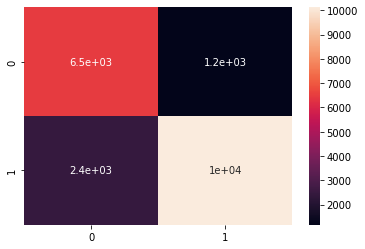

In [49]:
# evaluate model
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)

In [51]:
# predict test samples
submission = model.predict(test_df)
submission = pd.DataFrame(submission, columns=['TripReason'])
submission

,TripReason
0,Work
1,Int
2,Work
3,Work
4,Work
...,...
43288,Work
43289,Int
43290,Work
43291,Work
